In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/Batsman Performance Metrics.csv')

In [ ]:
scaled_df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/Batsman Performance Metrics (Scaled).csv')

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

#Fitting PCA on the scaled dataset
pca = PCA()
pca.fit(scaled_df)

#Getting the explained variance for each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

cumulative_variance

array([0.78048097, 0.8788952 , 0.94668263, 0.97457239, 0.99723712,
       0.99949558, 1.        ])

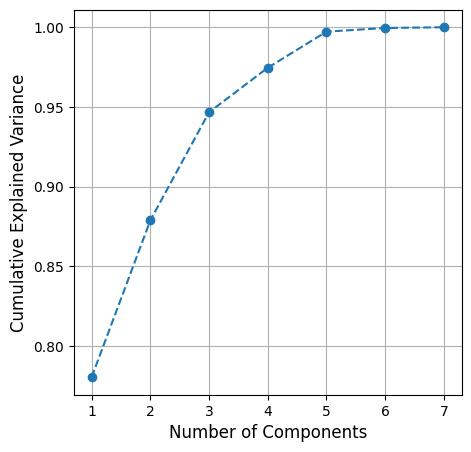

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
#Plotting the cumulative variance explained by each component
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance Explained')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()

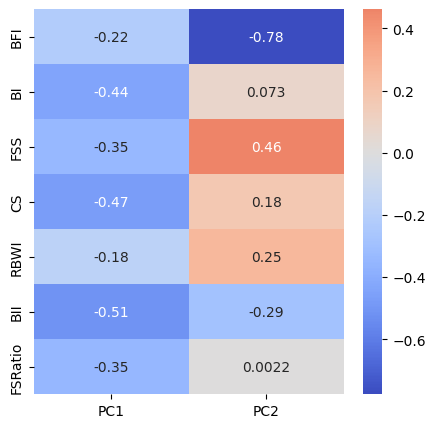

In [ ]:
import seaborn as sns

#Visualising the loadings as a heatmap
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)

plt.figure(figsize=(5,5))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.show()

# Cluster Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

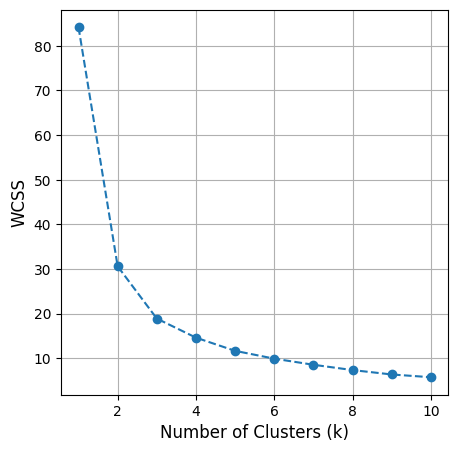

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

wcss = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

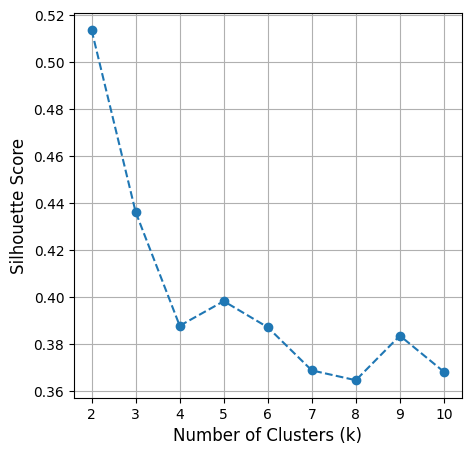

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values[1:]:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_data)
  score = silhouette_score(pca_data, kmeans.labels_)
  sil_scores.append(score)

plt.figure(figsize=(5,5))
plt.plot(k_values[1:], sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
# plt.title('Silhouette Score for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Applying K-means Clustering on the PCA Data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca_data)

#Adding the KMeans cluster labels to all the dataframes
df['KCluster'] = clusters
scaled_df['KCluster'] = clusters
pca_df['KCluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


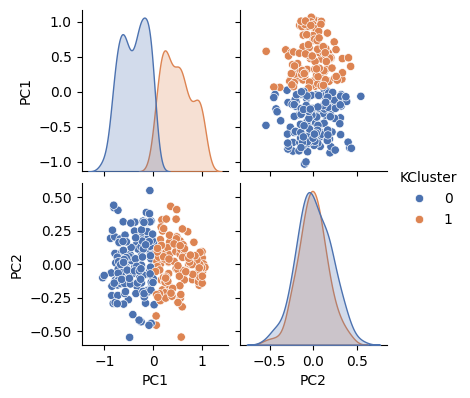

In [ ]:
#Visualising the clusters on the PCs
sns.pairplot(pca_df, hue='KCluster', diag_kind='kde', palette='deep', height=2, aspect=1)
plt.show()


In [ ]:
kcluster_means_summary = scaled_df.groupby('KCluster').mean()
kcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/KMeans (PCA) Means Summary.csv')

In [ ]:
kcluster_descriptive = scaled_df.groupby('KCluster').describe()
kcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/KMeans (PCA) Descriptive Statistics.csv')
kcluster_descriptive


BFI                                                              \
          count      mean       std       min       25%       50%       75%   
KCluster                                                                      
0         149.0  0.548336  0.170597  0.150788  0.430310  0.563777  0.668571   
1         120.0  0.361147  0.167369  0.000000  0.261563  0.345137  0.451082   

                       BI            ...       BII           FSRatio  \
               max  count      mean  ...       75%       max   count   
KCluster                             ...                               
0         1.000000  149.0  0.666733  ...  0.847997  1.000000   149.0   
1         0.892334  120.0  0.273395  ...  0.362554  0.678072   120.0   

                                                                                
              mean       std       min       25%       50%       75%       max  
KCluster                                                                        
0         0.418363  0.211037  0.066722  0.261127  0.386198  0.547709  1.000000  
1         0.106965  0.083694  0.000000  0.044592  0.088744  0.175764  0.344895  

[2 rows x 56 columns]

In [ ]:
#The weights of derived performance metrics can be changed according to what the user is looking for in the cluster data.
weights = {
    'BFI': 0.10,
    'BI': 1,
    'FSS': 1,
    'CS': 1,
    'RBWI': 0.10,
    'FSRatio': 0.5,
    'BII': 1
}

#The clusters value will be changed according to which cluster has the higher means
cluster_0_data = scaled_df[clusters == 0].copy()


cluster_0_data['Composite Score'] = (
    cluster_0_data['BFI'] * weights['BFI'] +
    cluster_0_data['BI'] * weights['BI'] +
    cluster_0_data['BII'] * weights['BII'] +
    cluster_0_data['CS'] * weights['CS'] +
    cluster_0_data['FSS'] * weights['FSS'] +
    cluster_0_data['RBWI'] * weights['RBWI'] +
    cluster_0_data['FSRatio'] * weights['FSRatio']
)


cluster_0_data['Batsman'] = df[clusters == 0]['Player'].values
cluster_0_data['Team'] = df[clusters == 0]['Team'].values


ranked_cluster_0 = cluster_0_data[['Batsman', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)


ranked_cluster_0


,Batsman,Team,Composite Score
57,C Dyer,Littletown CC Under 13,4.077043
172,Oliver Jackson,Castle Eden CC Under 13,4.066798
33,Alfie Blenkiron,Bishop Auckland CC Under 13,3.977343
130,C McCarthy,Dawdon Welfare CC Under 13,3.951857
39,Manas Chengalavala,Durham City CC Under 13 Blue,3.930869
...,...,...,...
265,Bradley Reay,Burnhope CC Under 13,2.126116
223,Dan Bell,Beamish and E. Stanley CC Under 13,2.073619
27,Lucas Barton,Ushaw Moor CC Under 13,2.073327
118,Eesa Irfan,South Shields CC Under 13 B,2.058309


In [ ]:
ranked_cluster_0['Rank'] = range(1, len(ranked_cluster_0) + 1)
ranked_cluster_0 = ranked_cluster_0[['Rank', 'Batsman', 'Team', 'Composite Score']]
ranked_cluster_0


,Rank,Batsman,Team,Composite Score
57,1,C Dyer,Littletown CC Under 13,4.077043
172,2,Oliver Jackson,Castle Eden CC Under 13,4.066798
33,3,Alfie Blenkiron,Bishop Auckland CC Under 13,3.977343
130,4,C McCarthy,Dawdon Welfare CC Under 13,3.951857
39,5,Manas Chengalavala,Durham City CC Under 13 Blue,3.930869
...,...,...,...,...
265,145,Bradley Reay,Burnhope CC Under 13,2.126116
223,146,Dan Bell,Beamish and E. Stanley CC Under 13,2.073619
27,147,Lucas Barton,Ushaw Moor CC Under 13,2.073327
118,148,Eesa Irfan,South Shields CC Under 13 B,2.058309


In [ ]:
ranked_cluster_0.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Player Ranking KMeans (PCA).csv', index=False)

# Hierarchical Clustering

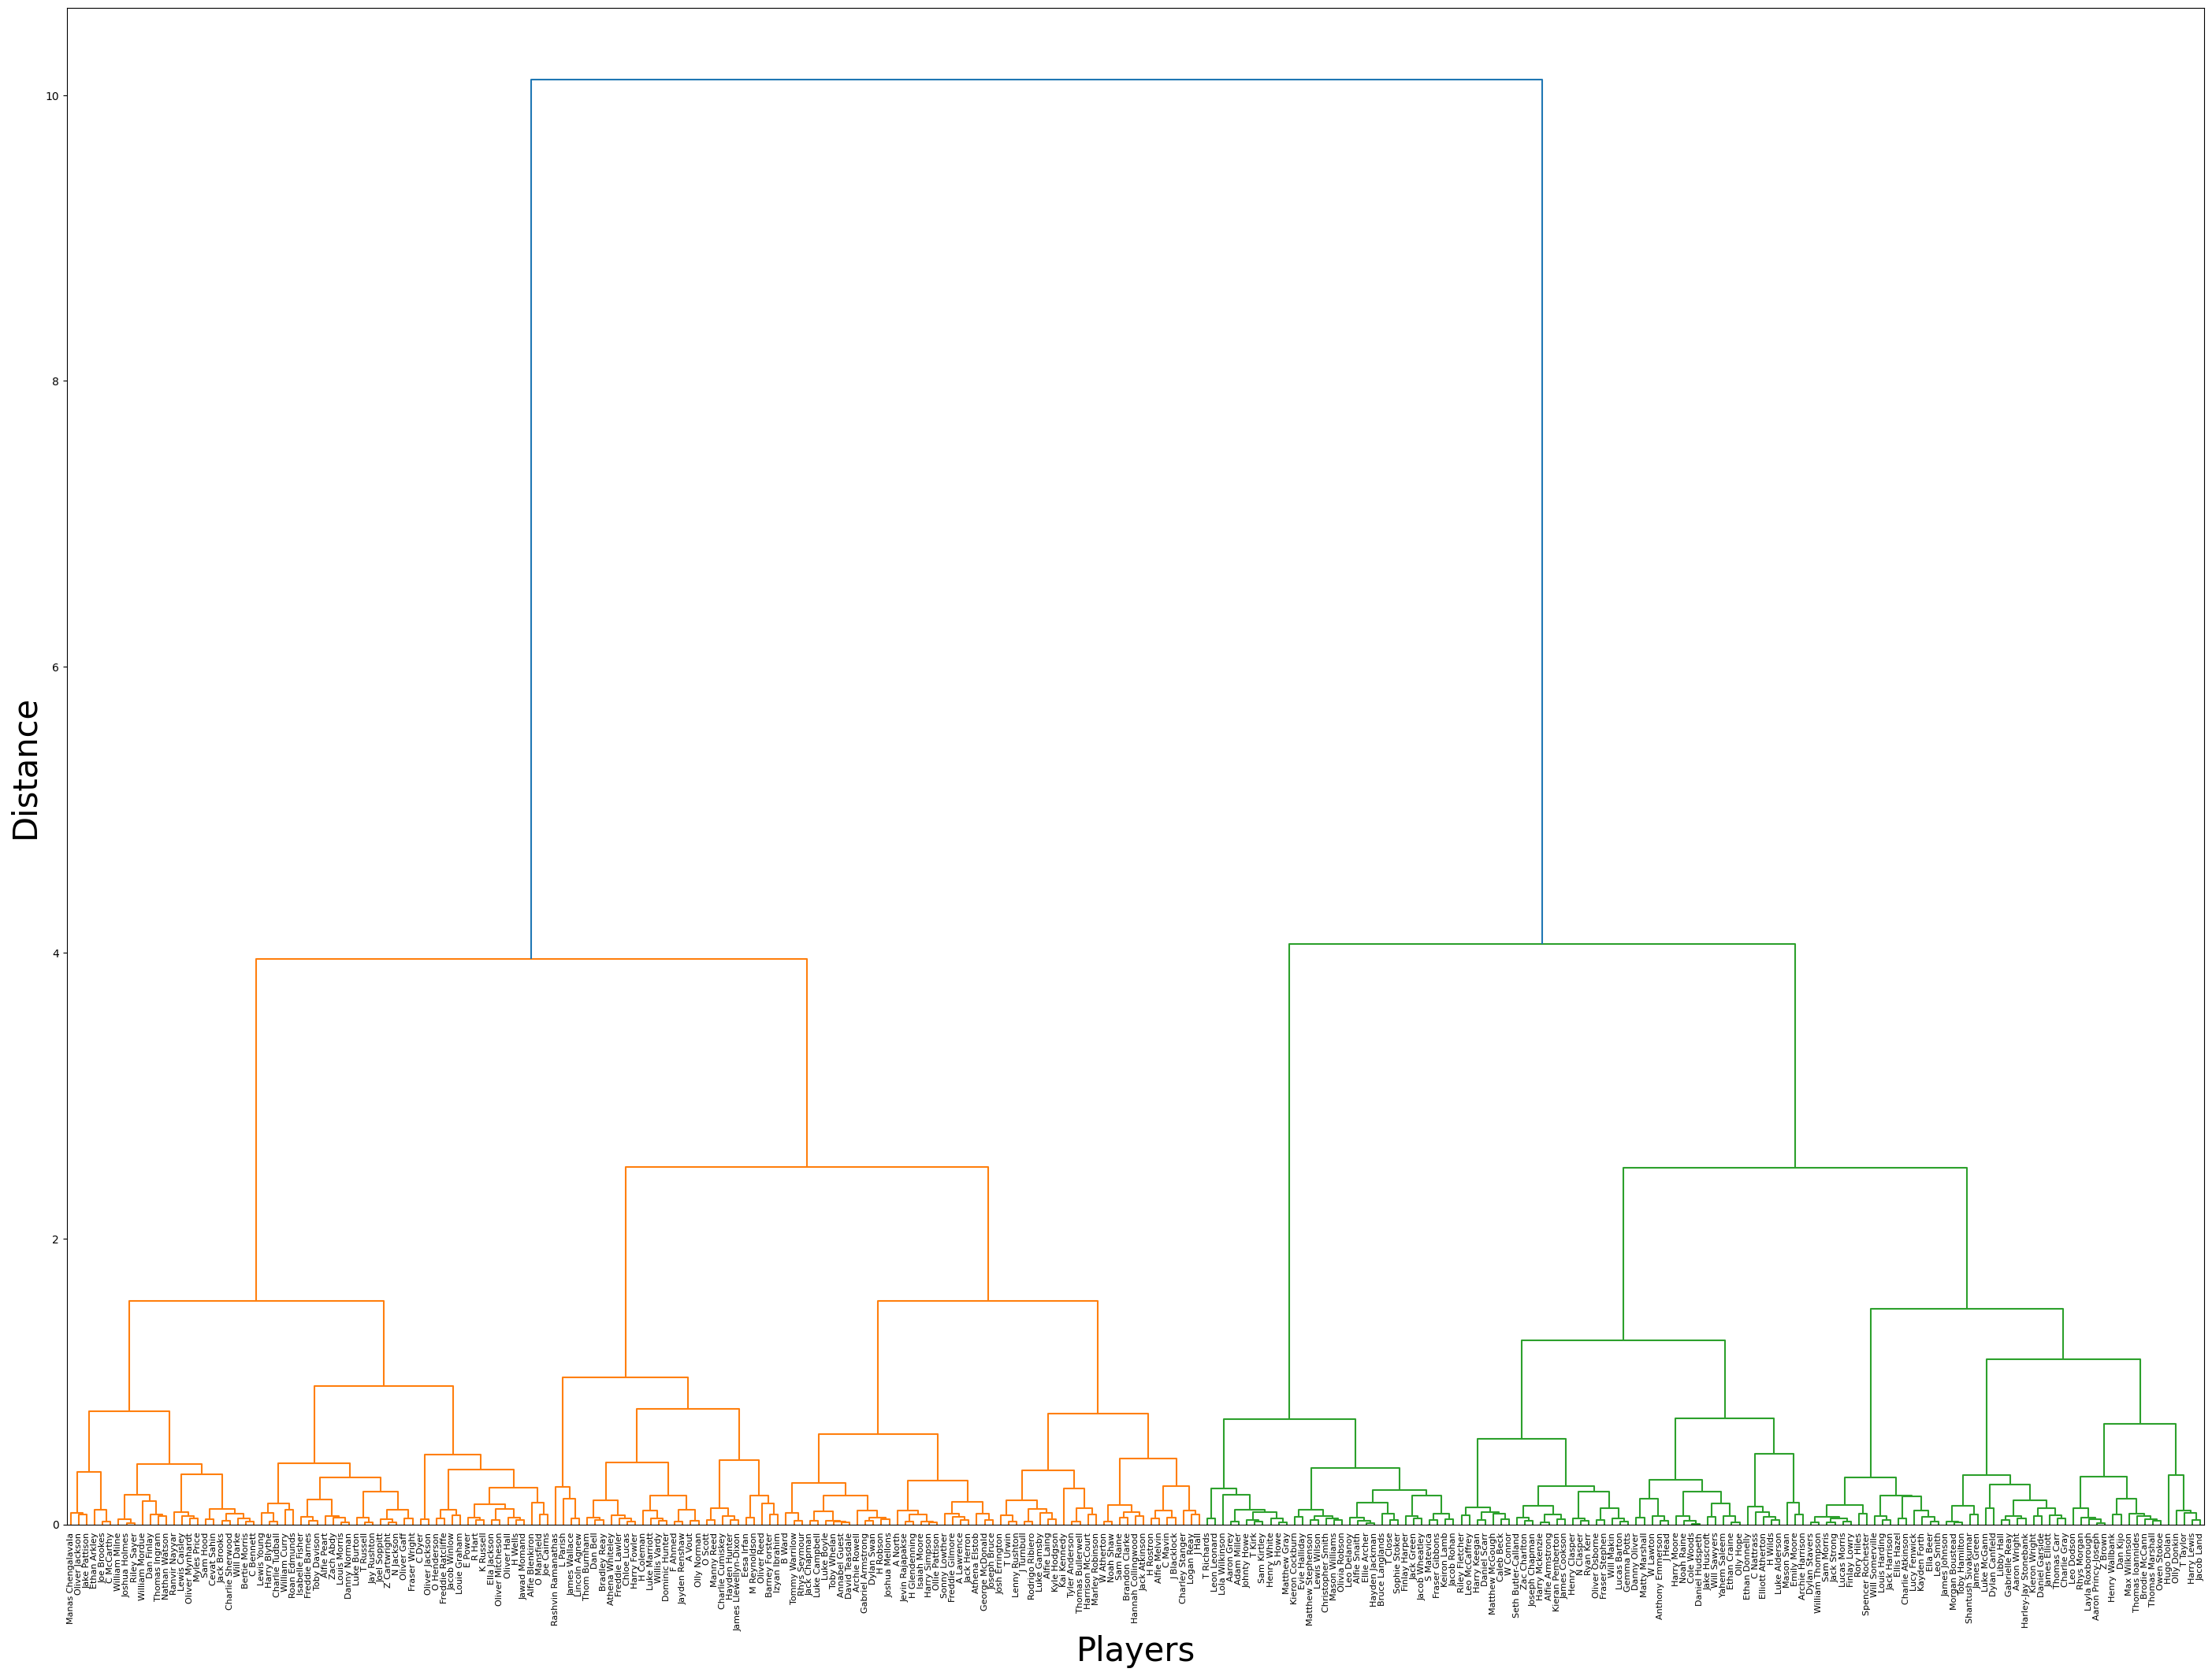

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


h_linkage = linkage(pca_data, method='ward')

plt.figure(figsize=(35,25))
dendrogram(h_linkage, labels=df['Player'].values, leaf_rotation=90, leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrogram', fontsize=25)
plt.xlabel('Players', fontsize=30)
plt.ylabel('Distance', fontsize=30)
plt.show()

In [ ]:
h_labels = fcluster(h_linkage, t=4.5, criterion='distance')

df['HCluster'] = h_labels
scaled_df['HCluster'] = h_labels

In [ ]:
pca_df['HCluster'] = h_labels

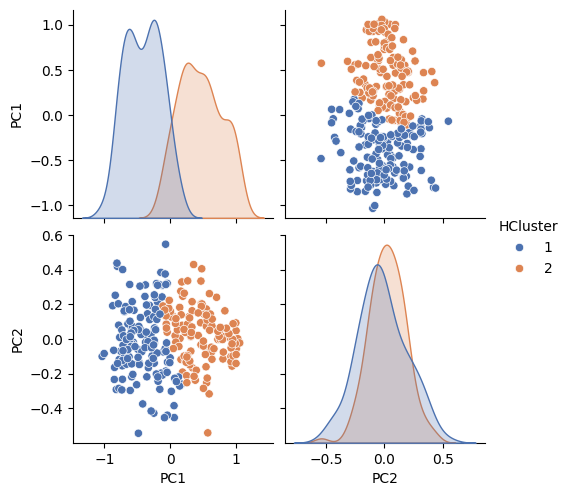

In [ ]:
sns.pairplot(pca_df.drop('KCluster', axis=1), hue='HCluster', diag_kind='kde', palette='deep')
# plt.suptitle('Hierarchical Clustering for Principal Components', fontsize=16)
plt.show()

In [ ]:
hcluster_means_summary = scaled_df.drop('KCluster',axis=1).groupby('HCluster').mean()
hcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Hierarchical (PCA) Means Summary.csv')

In [ ]:
hcluster_descriptive = scaled_df.drop('KCluster',axis=1).groupby('HCluster').describe()
hcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Hierarchical (PCA) Descriptive Statistics.csv')

In [ ]:
#The h_labels value will be changed according to which cluster has higher means
h_cluster_1_data = scaled_df.drop('KCluster', axis=1)[h_labels == 1].copy()

h_cluster_1_data['Composite Score'] = (
    h_cluster_1_data['BFI'] * weights['BFI'] +
    h_cluster_1_data['BI'] * weights['BI'] +
    h_cluster_1_data['BII'] * weights['BII'] +
    h_cluster_1_data['CS'] * weights['CS'] +
    h_cluster_1_data['FSS'] * weights['FSS'] +
    h_cluster_1_data['RBWI'] * weights['RBWI'] +
    h_cluster_1_data['FSRatio'] * weights['FSRatio']
)


h_cluster_1_data['Batsman'] = df[h_labels==1]['Player'].values
h_cluster_1_data['Team'] = df[h_labels == 1]['Team'].values


h_ranked_cluster = h_cluster_1_data[['Batsman', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)


h_ranked_cluster

,Batsman,Team,Composite Score
57,C Dyer,Littletown CC Under 13,4.077043
172,Oliver Jackson,Castle Eden CC Under 13,4.066798
33,Alfie Blenkiron,Bishop Auckland CC Under 13,3.977343
130,C McCarthy,Dawdon Welfare CC Under 13,3.951857
39,Manas Chengalavala,Durham City CC Under 13 Blue,3.930869
...,...,...,...
107,Izyan Ibrahim,Wearmouth & YAV CC Under 13,1.872243
28,Barney Forster,Willington CC Under 13,1.867227
190,Charlie Cumiskey,Silksworth CC Under 13,1.830954
30,Manny Reed,Tudhoe CC Under 13,1.764090


In [ ]:
h_ranked_cluster['Rank'] = range(1, len(h_ranked_cluster) + 1)
h_ranked_cluster = h_ranked_cluster[['Rank', 'Batsman', 'Team', 'Composite Score']]
h_ranked_cluster


,Rank,Batsman,Team,Composite Score
57,1,C Dyer,Littletown CC Under 13,4.077043
172,2,Oliver Jackson,Castle Eden CC Under 13,4.066798
33,3,Alfie Blenkiron,Bishop Auckland CC Under 13,3.977343
130,4,C McCarthy,Dawdon Welfare CC Under 13,3.951857
39,5,Manas Chengalavala,Durham City CC Under 13 Blue,3.930869
...,...,...,...,...
107,139,Izyan Ibrahim,Wearmouth & YAV CC Under 13,1.872243
28,140,Barney Forster,Willington CC Under 13,1.867227
190,141,Charlie Cumiskey,Silksworth CC Under 13,1.830954
30,142,Manny Reed,Tudhoe CC Under 13,1.764090


In [ ]:
h_ranked_cluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Player Ranking Hierarchical (PCA).csv', index=False)


In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Scaled Data with clusters.csv', index=False)
df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/Data with clusters.csv', index=False)
pca_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/Analysis (PCA)/PCA Data with clusters.csv', index=False)